<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/Ejercicio_de_transformada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicios
Presente y describa el modelo que utiliza la FFT para el cálculo de los armónicos.

Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.

Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.

Diseñe e implemente un detector de género musical, que permita diferenciar entre tres tipos de género. Para ello, construya una base de datos con al menos 30 registros por género musical, de 5 segundos cada uno, y luego implemente un código que permita recibir un nuevo registro músical de 5 segundos para detectar el género de la canción a partir de la distancia Euclídea entre la magnitud del espectro de Fourier del nuevo registro, y las magnitudes de los espectros de la base de datos construida (Ver Cuaderno YouTube Download/Detector).

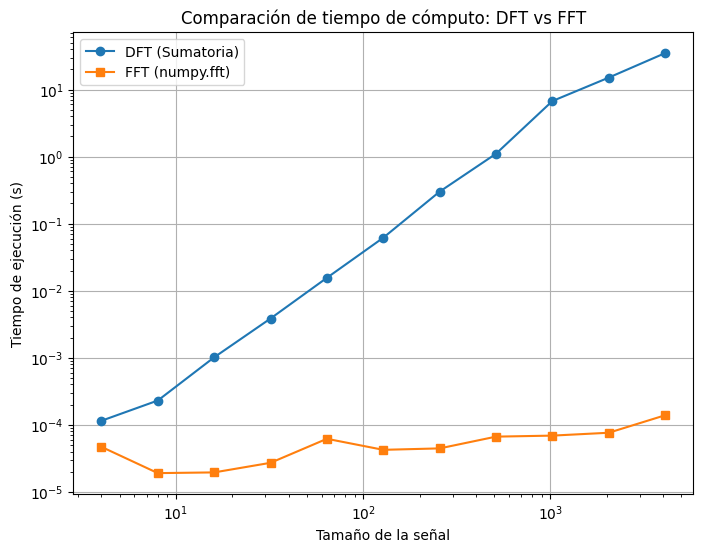

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

def dft(x):
    """Calcula la Transformada Discreta de Fourier (DFT) manualmente."""
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Valores de longitud de la señal de entrada
sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

dft_times = []
fft_times = []

for N in sizes:
    x = np.random.rand(N)  # Señal aleatoria

    # Medir tiempo de DFT
    start = time.time()
    dft(x)
    end = time.time()
    dft_times.append(end - start)

    # Medir tiempo de FFT
    start = time.time()
    np.fft.fft(x)
    end = time.time()
    fft_times.append(end - start)

# Graficar los tiempos de cómputo
plt.figure(figsize=(8,6))
plt.plot(sizes, dft_times, 'o-', label='DFT (Sumatoria)')
plt.plot(sizes, fft_times, 's-', label='FFT (numpy.fft)')
plt.xlabel("Tamaño de la señal")
plt.ylabel("Tiempo de ejecución (s)")
plt.yscale("log")  # Escala logarítmica para mejor visualización
plt.xscale("log")
plt.legend()
plt.grid()
plt.title("Comparación de tiempo de cómputo: DFT vs FFT")
plt.show()


In [2]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

def aplicar_filtro(audio, fs, tipo, f1=0, f2=0):
    """Aplica un filtro en frecuencia usando FFT e iFFT."""
    N = len(audio)
    espectro = fft(audio)
    freqs = np.fft.fftfreq(N, 1/fs)

    espectro_filtrado = espectro.copy()

    if tipo == 'pasa bajas':
        espectro_filtrado[np.abs(freqs) > f1] = 0
    elif tipo == 'pasa altas':
        espectro_filtrado[np.abs(freqs) < f1] = 0
    elif tipo == 'pasa bandas':
        espectro_filtrado[(np.abs(freqs) < f1) | (np.abs(freqs) > f2)] = 0
    elif tipo == 'rechaza bandas':
        espectro_filtrado[(np.abs(freqs) > f1) & (np.abs(freqs) < f2)] = 0

    audio_filtrado = np.real(ifft(espectro_filtrado))
    return audio_filtrado

# Cargar archivo de audio
fs, audio = wav.read("audio.wav")  # Reemplaza con el nombre de tu archivo WAV

# Aplicar filtros
f1, f2 = 1000, 5000  # Frecuencias de corte en Hz
pasa_bajas = aplicar_filtro(audio, fs, 'pasa bajas', f1)
pasa_altas = aplicar_filtro(audio, fs, 'pasa altas', f1)
pasa_bandas = aplicar_filtro(audio, fs, 'pasa bandas', f1, f2)
rechaza_bandas = aplicar_filtro(audio, fs, 'rechaza bandas', f1, f2)

# Guardar los audios filtrados
wav.write("pasa_bajas.wav", fs, pasa_bajas.astype(np.int16))
wav.write("pasa_altas.wav", fs, pasa_altas.astype(np.int16))
wav.write("pasa_bandas.wav", fs, pasa_bandas.astype(np.int16))
wav.write("rechaza_bandas.wav", fs, rechaza_bandas.astype(np.int16))

# Graficar espectros
plt.figure(figsize=(10,6))
plt.magnitude_spectrum(audio, Fs=fs, color='black', alpha=0.5, label='Original')
plt.magnitude_spectrum(pasa_bajas, Fs=fs, color='blue', label='Pasa bajas')
plt.magnitude_spectrum(pasa_altas, Fs=fs, color='red', label='Pasa altas')
plt.magnitude_spectrum(pasa_bandas, Fs=fs, color='green', label='Pasa bandas')
plt.magnitude_spectrum(rechaza_bandas, Fs=fs, color='purple', label='Rechaza bandas')
plt.legend()
plt.title("Espectros de señales filtradas")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'audio.wav'